In [70]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [72]:
dataset = load_dataset(path=r"C:\Users\mlfav\lib\shlee\color_palette", split="train")
dataset.set_format(type="torch", columns=["input_colors", "output_colors"], dtype=torch.float32)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, drop_last=True)

c:\Users\mlfav\anaconda3\envs\kjk_py39\lib\site-packages\datasets\load.py:922: FutureWarning: The repository for color_palette contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at C:\Users\mlfav\lib\shlee\color_palette\color_palette.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [73]:
len(dataloader)

7639

In [74]:
dataloader.dataset

Dataset({
    features: ['image', 'input_colors', 'output_colors'],
    num_rows: 30559
})

In [75]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(in_features=4*3, out_features=24)
        self.layer2 = nn.Linear(in_features=24, out_features=48)
        self.normalize = nn.LayerNorm((48,))
        self.layer3 = nn.ReLU()
        self.layer4 = nn.Linear(in_features=48, out_features=24)
        self.normalize2 = nn.LayerNorm((24,))
        self.layer5 = nn.ReLU()
        self.layer6 = nn.Linear(in_features=24, out_features=4*3)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.normalize(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.normalize2(x)
        x = self.layer5(x)
        x = self.layer6(x)
        
        return x

In [76]:
model = Model().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [77]:
def train(dataloader):
    train_loss = []
    for data in dataloader:
        x = data['input_colors'].to(device)
        y = data['output_colors'].to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)

        loss = loss_func(output, y)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.cpu().detach().numpy())
    return np.array(train_loss).mean()

In [78]:
train_loss = []

for epoch in range(10):
    
    loss = train(dataloader)
    train_loss.append(loss)
    print(loss)

2703.25
2306.9636
2233.2522
2184.5452
2143.3008
2122.043
2109.3752
2097.5627
2089.2673
2078.4292


In [79]:
x = y = output = None
with torch.no_grad():

    data = dataloader.__iter__()._next_data()

    x = data['input_colors'].to(device)
    y = data['output_colors']
    output = model.forward(x)

In [80]:
x = x[0].cpu().detach().numpy()
y = y[0].cpu().detach().numpy()
output = output[0].cpu().detach().numpy()

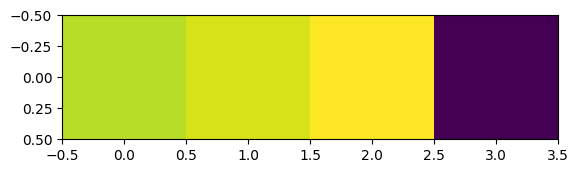

In [81]:
plt.imshow([[x[i] for i in range(4)]])

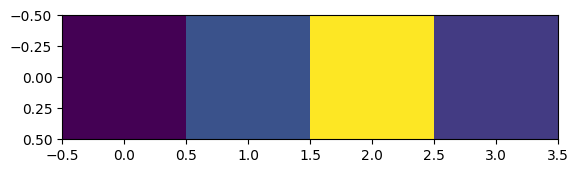

In [82]:
plt.imshow([[y[i] for i in range(4)]])

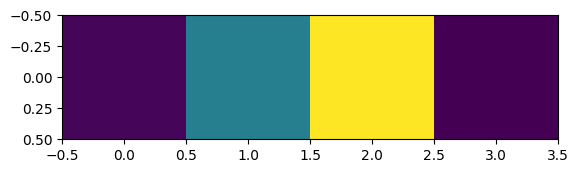

In [83]:
plt.imshow([[output[i] for i in range(4)]])